In [6]:
import theano.tensor as T
from theano.tensor.nnet import conv
import numpy as np
import theano

In [15]:
rng = np.random.RandomState(3455)
input = T.tensor4(name='input')
w_shp = (2, 3, 9, 9)
w_bound = np.sqrt(3 * 9 * 9)
W = theano.shared(np.asarray(rng.uniform(low = -1.0 / w_bound, high = 1.0 / w_bound, size = w_shp),
                             dtype = input.type), name = 'W')
b_shp = (2, )
b = theano.shared(np.asarray(rng.uniform(low = -.5, high = .5, size = b_shp), 
                             dtype = input.type), name = 'b')
conv_out = conv.conv2d(input, W)
output = T.nnet.sigmoid(conv_out + b.dimshuffle('x', 0, 'x', 'x'))
f = theano.function([input], output)

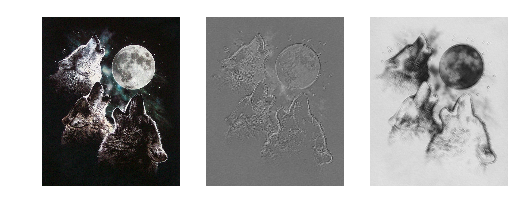

In [16]:
import numpy as np
import pylab
from PIL import Image

img = Image.open(open('./3wolfmoon.jpg'))
img = np.asarray(img, dtype='float64') / 256
img_ = img.swapaxes(0, 2).swapaxes(1, 2).reshape(1, 3, 639, 516)
filtered_img = f(img_)
pylab.subplot(1, 3, 1); pylab.axis('off'); pylab.imshow(img)
pylab.gray();
pylab.subplot(1, 3, 2); pylab.axis('off'); pylab.imshow(filtered_img[0, 0, :, :])
pylab.subplot(1, 3, 3); pylab.axis('off'); pylab.imshow(filtered_img[0, 1, :, :])
pylab.show()

In [3]:
from theano.tensor.signal import downsample
import theano.tensor as T
import numpy as np
import theano

input = T.dtensor4('input')
maxpool_shape = (2, 2)
pool_out = downsample.max_pool_2d(input, maxpool_shape, ignore_border = True)
f = theano.function([input], pool_out)

invals = np.random.RandomState(1).rand(3, 2, 5, 5)
print 'With ignore_border set to True:'
print 'invals[0, 0, :, :] = \n', invals[0, 0, :, :]
print 'output[0, 0, :, :] = \n', f(invals)[0, 0, :, :]
pool_out = downsample.max_pool_2d(input, maxpool_shape, ignore_border = False)
f = theano.function([input], pool_out)
print 'With ignore_border set to False:'
print 'invals[1, 0, :, :] = \n', invals[1, 0, :, :]
print 'output[1, 0, :, :] = \n', f(invals)[1, 0, :, :]

With ignore_border set to True:
invals[0, 0, :, :] = 
[[  4.17022005e-01   7.20324493e-01   1.14374817e-04   3.02332573e-01
    1.46755891e-01]
 [  9.23385948e-02   1.86260211e-01   3.45560727e-01   3.96767474e-01
    5.38816734e-01]
 [  4.19194514e-01   6.85219500e-01   2.04452250e-01   8.78117436e-01
    2.73875932e-02]
 [  6.70467510e-01   4.17304802e-01   5.58689828e-01   1.40386939e-01
    1.98101489e-01]
 [  8.00744569e-01   9.68261576e-01   3.13424178e-01   6.92322616e-01
    8.76389152e-01]]
output[0, 0, :, :] = 
[[ 0.72032449  0.39676747]
 [ 0.6852195   0.87811744]]
With ignore_border set to False:
invals[1, 0, :, :] = 
[[ 0.01936696  0.67883553  0.21162812  0.26554666  0.49157316]
 [ 0.05336255  0.57411761  0.14672857  0.58930554  0.69975836]
 [ 0.10233443  0.41405599  0.69440016  0.41417927  0.04995346]
 [ 0.53589641  0.66379465  0.51488911  0.94459476  0.58655504]
 [ 0.90340192  0.1374747   0.13927635  0.80739129  0.39767684]]
output[1, 0, :, :] = 
[[ 0.67883553  0.58930554